In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load Image

In [26]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

In [27]:
import cv2

filename = "img.jpg"  
img = cv2.imread(filename)

if img is None:
    print("Error: Could not read the image. Check the file path.")
else:
    print("Image successfully read!")
    cv2.imshow("Image", img)  # Display the image
    cv2.waitKey(0)  
    cv2.destroyAllWindows()


Image successfully read!


#CREATE EDGEMASK


In [22]:
def edge_mask(img ,line_size, blur_value):
    """
    input :Input Image
    output :Edges of Image

    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,line_size,blur_value)
    
    return edges



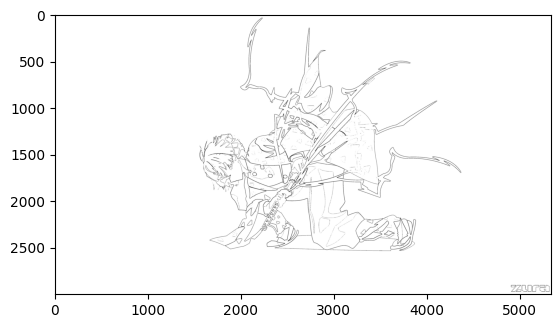

In [28]:
import matplotlib.pyplot as plt

line_size, blur_value = 7,7
edges = edge_mask(img ,line_size, blur_value)

plt.imshow(edges, cmap = "gray")
plt.show()

Reduce the Color Palette

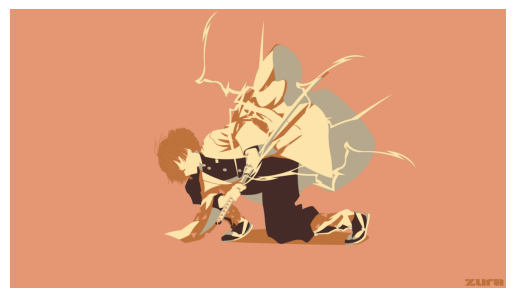

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_quantization(img, k):
    # Transform the image into a 2D array of pixels
    data = np.float32(img).reshape((-1, 3))
    
    # Define the criteria for k-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    # Apply k-means clustering
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    # Map each pixel to its respective cluster center
    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

# Load an image
img = cv2.imread("img.jpg")
if img is None:
    print("Error: Could not read the image.")
else:
    # Convert BGR to RGB for displaying with Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply color quantization with k=n
    quantized_img = color_quantization(img, k=9)

    # Display the quantized image using Matplotlib
    plt.imshow(quantized_img)
    plt.axis("off")  # Hide axes for better visualization
    plt.show()


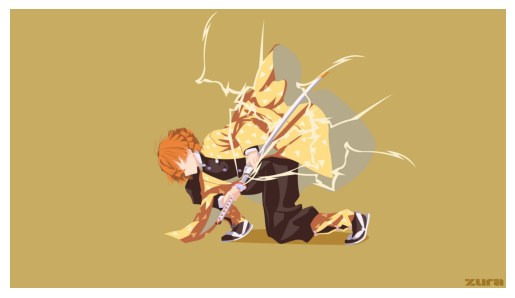

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("img.jpg")
if img is None:
    print("Error: Could not read the image.")
else:
    # Convert BGR to RGB for proper display with Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply bilateral filter to reduce noise
    blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)

    # Display the blurred image
    plt.imshow(blurred)
    plt.axis("off")  # Hide axes for better visualization
    plt.show()


#combine edge mask with the quantized image


In [7]:
def cartoon(blurred):
    c = cv2.bitwise_and(blurred, blurred, mask= edges)

    plt.imshow(c)
    plt.show()

Image successfully read!


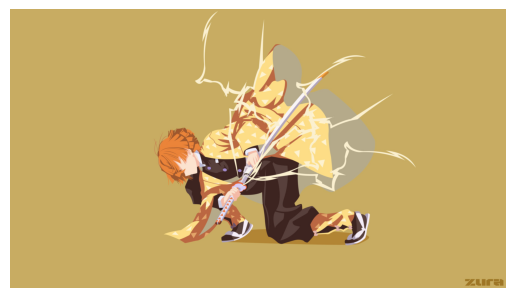

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
filename = "img.jpg"
img = cv2.imread(filename)

# Check if the image was loaded correctly
if img is None:
    print("Error: Could not read the image.")
else:
    print("Image successfully read!")

    # Convert the image to RGB for visualization with Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Make a copy of the original image
    org_img = np.copy(img)

    # Display the image
    plt.imshow(img)
    plt.axis("off")  # Hide axes for better visualization
    plt.show()

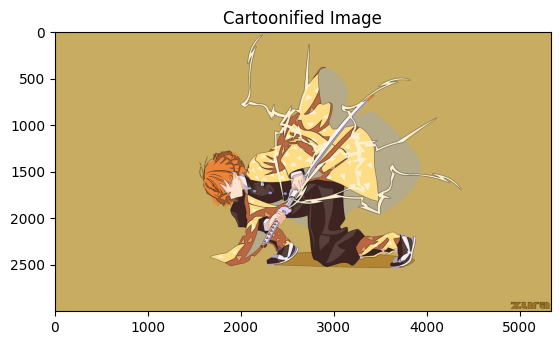

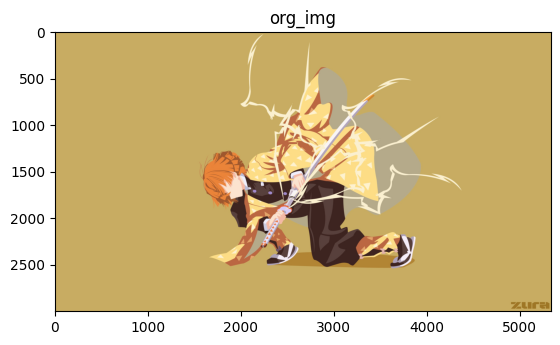

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to generate cartoon effect
def cartoon(blurred):
    # Convert the image to grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)

    # Apply a median blur to reduce noise
    gray_blurred = cv2.medianBlur(gray, 5)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(
        gray_blurred, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, 9, 9
    )

    # Combine the edges with the original blurred image
    c = cv2.bitwise_and(blurred, blurred, mask=edges)

    # Display the cartoon effect
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()

    plt.imshow(org_img)
    plt.title("org_img")
    plt.show

# Load and preprocess the image
img = cv2.imread("img.jpg")
if img is None:
    print("Error: Could not read the image.")
else:
    # Convert BGR to RGB for proper display with Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply bilateral filter to reduce noise
    blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)

    # Generate cartoon effect
    cartoon(blurred)
